# Predicting Parkinson's Disease

## Overview

### Pandas profiling
### characters of independent variable
### I. Data Preparation

### II. Modeling

Each modeling section consists of **an brief intro, the algorithm, discussion on related topics, and application** on the dataset.

1. kNN
    - Non-parametric Models
    - Algorithm
2. Naive Bayes  
    - Bayes Classifier
    - Algorithm
    - Generative Model vs. Discriminative Model
3. Logistic Regression
    - Sigmoid Function
    - Maximum Likelihood Estimation
    - Algorithm
    - (Also see Appendix A & B for related topics)
4. Support Vector Machine
    - Convex Sets and Convex Hulls
    - Algorithm
    - Soft-Margin SVM
5. Kernel SVM
    - Kernel
    - Mercer's theorem
    - RBF
    - Algorithm
6. Decision Tree

### III. Model Improvement
- PCA
    - Algorithm: The First Principal Component
    - Algorithm: General


### IV. Model Selection

- Classification Report

### V. Deployment



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
os.chdir('D:/Projects-data Science/Projects/Detection of Parkinsons Disease')

In [3]:
df = pd.read_csv('parkinsons.data')
display (df)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
import pandas_profiling as pf
display(pf.ProfileReport(df))

In [4]:
display (df.shape)

(195, 24)

In [5]:
display (df.dtypes )

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
display (df.isna().sum() )

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [10]:
df['status']

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

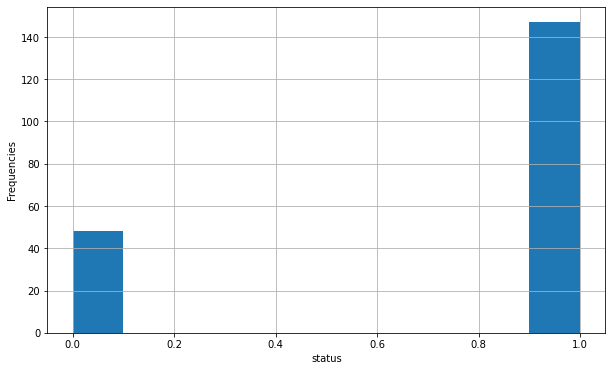

In [11]:
plt.figure(figsize=(10, 6))
df.status.hist()
plt.xlabel('status')
plt.ylabel('Frequencies')
plt.plot()
plt.show()

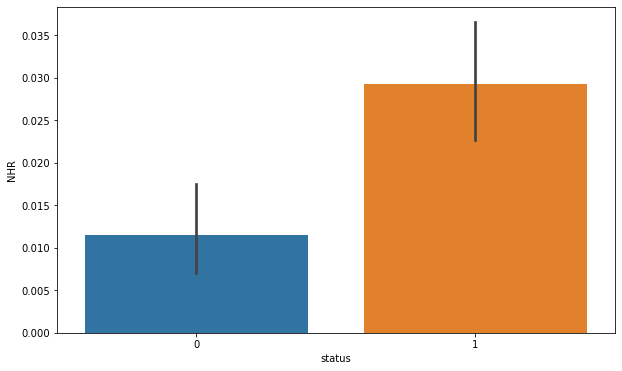

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="NHR",data=df)
plt.show()

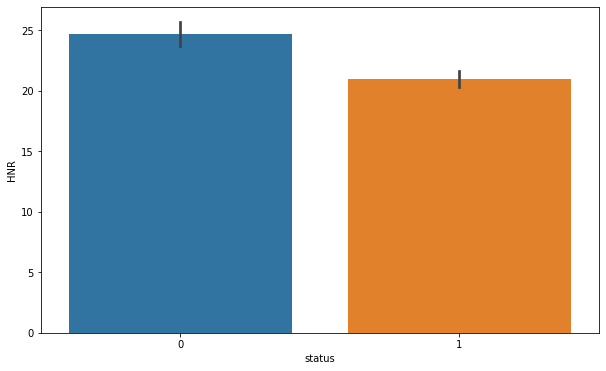

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="HNR",data=df);

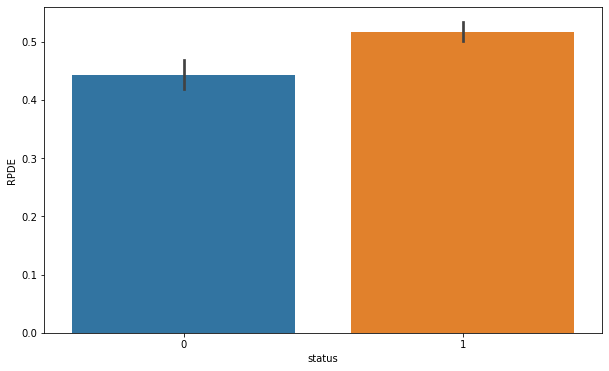

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="RPDE",data=df);
plt.show()

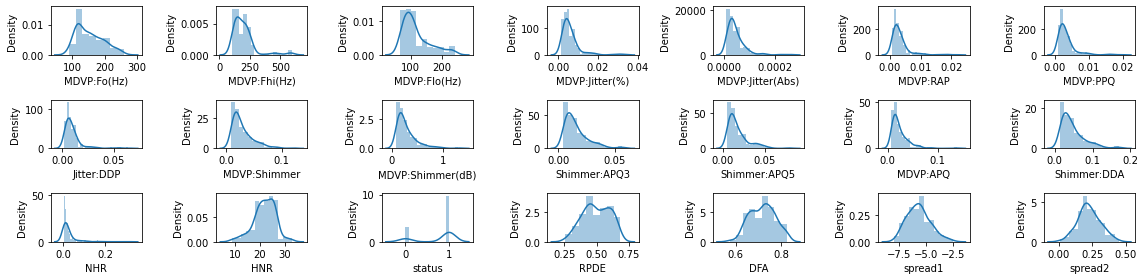

In [15]:
import warnings
warnings.filterwarnings('ignore')
rows=3
cols=7
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

In [16]:
corr = df.corr()
display (corr)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


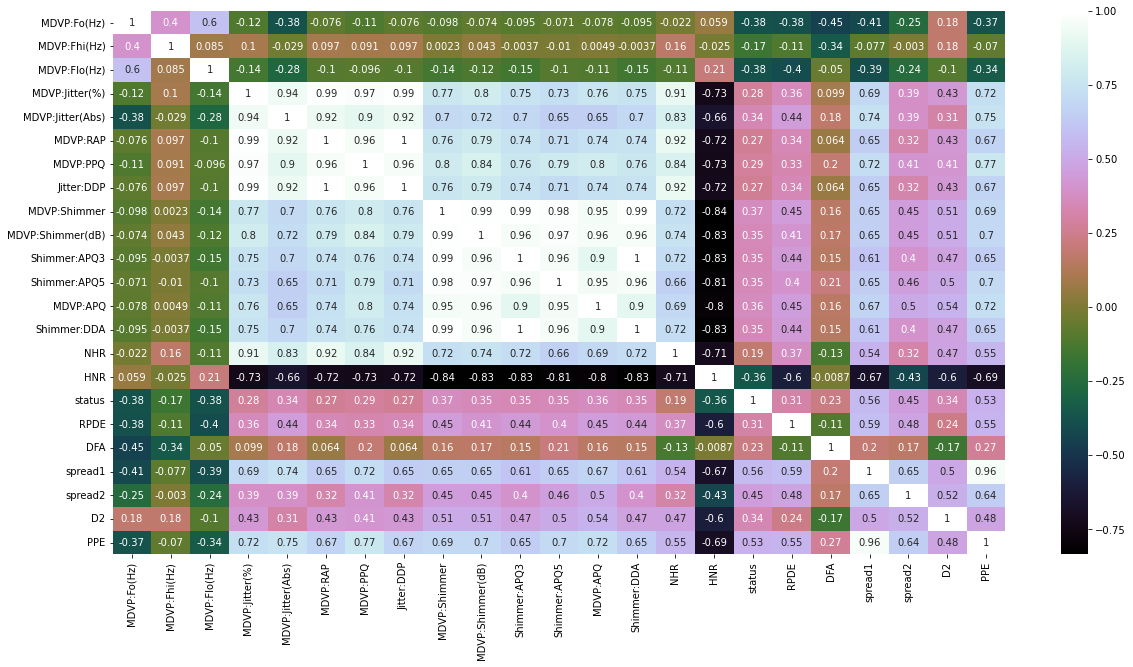

In [17]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='cubehelix',annot = True)
plt.show()

## I. Data Preparation


In [18]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## summary of datatypes

In [19]:
print('Summary of attribute datatypes:\n', df.dtypes.value_counts(), sep="")

Summary of attribute datatypes:
float64    22
object      1
int64       1
dtype: int64


In [20]:
df.drop(['name'],axis=1,inplace=True)

In [21]:
x=df.drop(labels=['status'],axis=1)
y=df['status']
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [22]:
display (y.head())

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [23]:
y.value_counts()

1    147
0     48
Name: status, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(156, 22) (39, 22) (156,) (39,)


In [34]:
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
147,183.520,216.814,161.340,0.01466,0.00008,0.00849,0.00819,0.02546,0.06050,0.618,...,0.06359,0.08595,0.06057,14.367,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
86,178.222,202.450,141.047,0.00321,0.00002,0.00163,0.00194,0.00488,0.03759,0.327,...,0.02784,0.06219,0.03151,15.924,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
69,148.090,162.824,67.343,0.00762,0.00005,0.00467,0.00354,0.01400,0.05428,0.497,...,0.03635,0.10070,0.02431,21.718,0.487407,0.727313,-6.261141,0.120956,2.137075,0.141958
125,145.174,198.109,80.637,0.00733,0.00005,0.00414,0.00422,0.01242,0.02362,0.233,...,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716


In [35]:
Y_train.value_counts()

1    116
0     40
Name: status, dtype: int64

### Problem Definition
**Input:** $X \in \mathbb{R}^{d}, d = 243$

**Output:** $Y = \{0, 1\}$

**Classifier:** Calssification uses a function $f$ (called a classifier) to map input $x$ to class $y$. 

$y = f(x) : f$ takes in $x \in X$ and declares its class to be $y \in Y$

## II. Modeling

### 1. k-Nearest Neighbors Classifier (kNN)
KNNs classify the unseen instance based on the K points in the training set which are nearest to it. It is a **non-parametric method**. 

#### Non-parametric Models
Non-parametric models differ from parametric models in that the model structure is not specified a priori but is instead determined from data. The term non-parametric is not meant to imply that such models completely lack parameters but that the number and nature of the parameters are flexible and not fixed in advance.

Source: https://en.wikipedia.org/wiki/Nonparametric_statistics#Non-parametric_models

#### Algorithm
Given data $(x_1, y_1),...,(x_n, y_n)$, construct the $k$-NN classifier as follows:
For a new input $s$,
1. Return the $k$ points closest to $x$, indexed as $x_{i_1},...x_{i_k}$.
2. Return the majority-vote of $y_{i_1}, y_{i_2},..., y_{i_k}$.
The default distance for data in $\mathbb{R}^d$ is the Euclidean one:
$$\|u-v\|_2 = \big(\sum_{i=1}^{d}(u_i-v_i)^2\big)^\frac{1}{2}$$

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [82]:
param_grid = {'n_neighbors': np.arange(3, 13)}
gs_kNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gs_kNN.fit(X_train, y_train)
print("Best Number of Neighbors:", gs_kNN.best_params_)
print("Accuracy on Training Set:", gs_kNN.best_score_)

y_pred_prob1 = gs_kNN.predict_proba(X_test)[:,1]
print("Accuracy on Test Set:", gs_kNN.score(X_test, y_test))
print("AUC:", roc_auc_score(Y_test, y_pred_prob1))

Best Number of Neighbors: {'n_neighbors': 3}
Accuracy on Training Set: 0.8590725806451613
Accuracy on Test Set: 0.7948717948717948
AUC: 0.872983870967742


In [38]:
# Compute training and test errors by k
training_error = list()
test_error = list()
for k in np.arange(3, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_error.append(knn.score(X_train, y_train))
    test_error.append(knn.score(X_test, y_test))

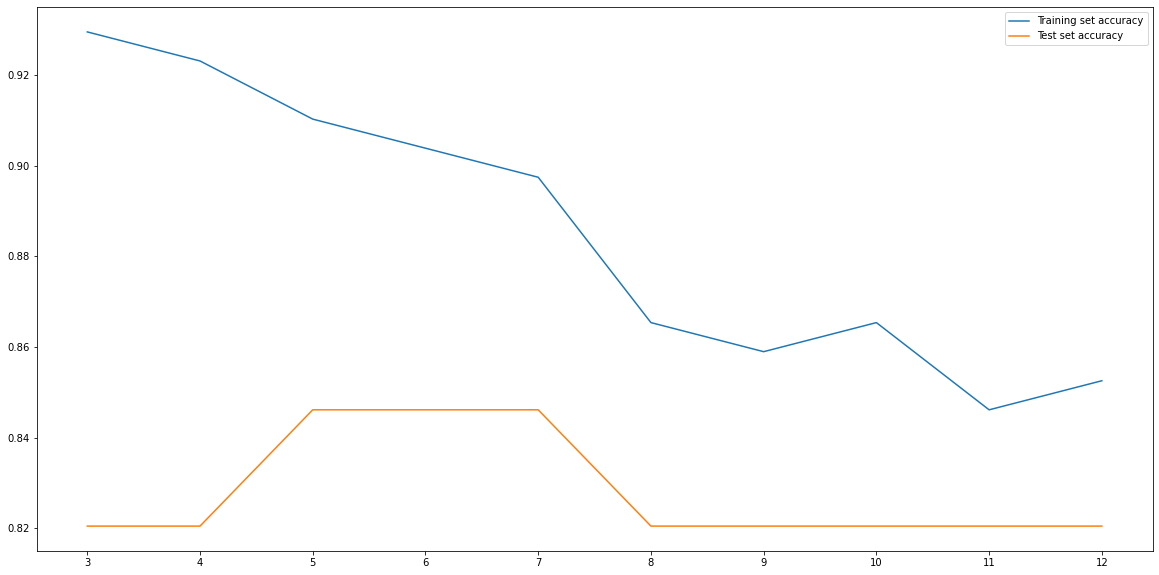

In [39]:
plt.plot(training_error, label = 'Training set accuracy')
plt.plot(test_error, label = 'Test set accuracy')
plt.legend()
plt.xticks(np.arange(0, 10), np.arange(3, 13))
plt.show()

### 2. Naive Bayes 

With Naive Bayes classifier we predict the class of a new $x$ to be the most probable lable given model and training data $(x_1, y_1), ..., (x_n, y_n)$.

#### Bayes Classifier
Before talking about the algorithm of Naive Bayes, we need to know **Bayes Classifer**:

$$f(x) = \operatorname*{arg\,max}_{y \in Y} P(Y = y| X = x)$$

For a particular input $x$, predict the label to be the most probable label conditioned on $x$ according to the true underlying distribution given to us from nature.

#### Bayes Rule: 
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$$

From Bayes rule we equivalently have
$$ f(x) \approx \operatorname*{arg\,max}_{y \in Y} P(Y = y) \times P(X = x | Y = y) $$
- $P(Y = y)$ is called the $\textit{class prior}$.
- $P(X = x|Y = y)$ is called the $\textit{class conditional distribution}$ of X.
- In practice we don't know either of these, so we approximate them.

Aside: If $X$ is a continuous-valued random variable, replace $P(X = x|Y = y)$ with class conditional density $p(x|Y=y)$.

Problem: We can't construct the Bayes classifier without knowing $P(Y = y|X = x)$, or equv., $P(X = x|Y = y)$ and $P(Y = y)$. All we have are labeled examples drowm from the distribution.

#### Naive Bayes Algorithm
We have to $\textit{define } p(X = x|Y = y)$.

Naive Bayes is a Bayes classifier that makes the assumption
$$p(X = x|Y = y) = \prod_{j=1}^{d}p_j(x(j)|Y = y),$$
i.e., it treats the dimension of $X$ as $\textit{conditionally independent}$ given $y$. 

Note: Each dimension might not be independent with each other, but they are conditionally independent given y.

#### Discriminative Model vs. Generative Model

Bayes Classifer and Naive Bayes are ***generative models***. Unlike distriminative models, generative models consider the joint probability distribution on $X \times y, P(X, y)$, make the prediction on the probability of each lable $y$ given $X$, $p(y|X = x)$, and then **pick the most likely lable $y$**.

##### Discriminative Algorithms
- Idea: model $p(y|x)$, conditional distribution of $y$ given $x$.
- In Discriminative Algorithms: find a **decision boundary** that separates positive from negative example.
- To predict a new example, check on which side of the decision boundary it falls.
- **Model $p(y|x)$ directly**

##### Generative Algorithms
- Idea: Build a model for what positive examples look like and build a different model for what negative example look like.
- To predict a new example, match it with each of the models and see which match is best.
- Model $p(x|y)$ and $p(y)$!
- **Use Bayes rule to obtain $p(y|x) = \frac{p(x|y)p(y)}{p(x)}$**

The definition of generative and distriminative models:
- a generative model is a model of the conditional probability of the observable $X$, given a target $y$, symbolically, $P(X|Y=y)$
- a discriminative model is a model of the conditional probability of the target $Y$, given an observation $x$, symbolically, $P(Y|X=x)$

source: https://en.wikipedia.org/wiki/Generative_model#Definition



In [40]:
from sklearn.naive_bayes import GaussianNB

In [83]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_prob2 = gnb.predict_proba(X_test)[:,1]

print("Accuracy on training set:", gnb.score(X_train, y_train))
print("Accuracy on test set:", gnb.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob2))

Accuracy on training set: 0.7756410256410257
Accuracy on test set: 0.8717948717948718
AUC: 0.717741935483871


### 3. Logistic Regression
Let $(x_1, y_1),...,(x_n, y_n)$ be a set of binary labeled data with $y \in {-1, +1}$. $\textit{Logistic regression}$ models each $y_i$ as independently generated, with

$$P(y_i = +1|x_i, w) = \sigma(x_i^Tw), \ \ \sigma(x_i; w) = \frac{e^{x_iTw}}{1 + e^{x_iTw}}.$$

#### Sigmoid Function
From **Linear Discriminative Analysis**, we can directly plug in the **hyperplane representation** for the **log odds**. ***(See Appendix A: Concepts for Logistic Regression & Appendix B: Linear Classifiers)***

$$\ln\frac{p(y = +1|x)}{p(y = -1|x)} = x^Tw + w_0$$

Note: No restrictions on $w$ and $w_0$ compared to LDA.

Setting $p(y = -1|x) = 1 - p(y = -1|x)$, solve for $p(y = +1|x)$ to find 
$$ p(y = +1|x) = \frac{exp^{x^Tw + w_0}}{1 + exp^{x^Tw + w_0}} = \sigma(x^tw + w_0). $$

- This is called the sigmoid function
- We have chosen $x^Tw + w_0$ as the $\textit{link function}$ for log odds.
- If $x^Tw > 0$, then $\sigma(x^Tw) > 1/2$ and predict $y = +1$, and vice versa.
- We now get **a confidence in our prediction** via the probability of $\sigma (x^Tw)$.


#### Maximum Likelihood Estimation

Define $\sigma_i(w) = \sigma(x_i^Tw)$. The joint likihood of $y_1,...y_n$ is
$$p(y_1,...,y_n|x_1,...,x_n, w) = \prod_{i=1}^{n}p(y_i|x_i, w)
= \prod_{i=1}^{n}\sigma_i(w)^{\mathbb{I}(y_i=+1)}(1-\sigma_i(w))^{\mathbb{I}(y_i=-1)} 
= \prod_{i=1}^{n}\sigma_i(y_i \cdot w)$$

Note: here y = {+1, -1}

we want to maximize this over $w$.

The maximum likelihood solution for $w$ can be written 
$$ w_{ML} = \operatorname*{arg\,max}_{w} \sum_{i=1}^{n}\ln\sigma_i(y_i\cdot w)
= \operatorname*{arg\,max}_{w} L $$

We can't directly set $\nabla_w L = 0$, so we need an iterative algorithm. At step $t$, we can update
$$ w^{(t+1)}=w^{(t)}+\eta\nabla_wL \ \ \nabla_wL = \sum_{i=1}{n}(1-\sigma_i(y_i\cdot w))y_ix_i $$


#### Algorithm

**Input**: Training data $(x_1, y_1),...,(x_n, y_n)$ and step size $\eta > 0$
1. **Set** $w^{(1)} = \overrightarrow{0}$
2. **For step** $t = 1,2,...$ **do**
    - Update $w^{(t+1)} = w^{(t)} + \eta\sum_{i=1}^{n}(1-\sigma_i(y_i\cdot w))y_ix_i$

In [42]:
from sklearn.linear_model import LogisticRegression

In [84]:
%%time
# Build logistic model with L2 regularization
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1, 10, 100], 
              'tol': [1e-4, 1e-5], 
              'max_iter': [100, 500]}
gs_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5)
gs_lr.fit(X_train, y_train)
print("Best Parameters:", gs_lr.best_params_)
print("Accuracy on Training Set:", gs_lr.best_score_)

y_pred_prob3 = gs_lr.predict_proba(X_test)[:,1]
print("Accuracy on Test Set:", gs_lr.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob3))

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}
Accuracy on Training Set: 0.8016129032258064
Accuracy on Test Set: 0.8717948717948718
AUC: 0.6814516129032258
CPU times: total: 375 ms
Wall time: 375 ms


In [85]:
y_pred = gs_lr.predict(X_test)
print(y_pred_prob[:5])
print(y_pred[:5])
print(y_test[:5])

[1.         0.95327103 0.95327103 0.         0.95327103]
[1 1 1 0 1]
96     1
5      1
116    1
35     0
178    1
Name: status, dtype: int64


In [46]:
# Moving the threshold 
for t in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    y_pred_rev = [1 if i > t else 0 for i in y_pred_prob]
    print('Threshold: {}, Accuracy: {}'.format(t, accuracy_score(y_pred_rev, y_test)))

Threshold: 0.3, Accuracy: 0.8717948717948718
Threshold: 0.4, Accuracy: 0.8974358974358975
Threshold: 0.5, Accuracy: 0.8461538461538461
Threshold: 0.6, Accuracy: 0.8461538461538461
Threshold: 0.7, Accuracy: 0.8205128205128205
Threshold: 0.8, Accuracy: 0.7435897435897436


### 4. Support Vector Machine

With two linearly separable classes, choose a hyperplane such that its distance to the **closest point in each class** is maximized to achieve good generalization (low prediction error).

#### Convex Sets and Convex Hulls
Where a seperating hyperplane may be placed depends on the "outer" points on the sets. Points in the center do not matter. In geometric terms, we can represent each class by the smallest convex set which contains all point in the class. This is called a $\textit{convex hull}$.

A convex hull is defined by all possible weighted averages of points in a set. That is, let $x_1,...x_n$ be the data coordinates. Every point $x_0$ in the convex hull can be reached by setting
$$ x_0 = \sum_{i=1}^{n}\alpha_ix_i, \ \ \alpha_i \geq0, \ \ \sum_{i=1}^{n}\alpha_i = 1,$$
for some $(\alpha_1,...\alpha_n)$. No point outside the convex hull can be reached this way.

#### Algorithm
For $n$ seperate points $(x_1,y_1),...,(x_n,y_n)$ with $y_i \in {\pm1}$, solve:
$$ \min_{w, w_0} \frac{1}{2}\|w\|^2 $$
subject to
$$ y_i(x_i^Tw + w_0) \geq 1 \ \ for\ i = 1,...,n$$

- If there exists a hyperplan $H$ that separates the classes, we can scale $w$ so that $y_i(x_i^Tw+w_0)>1$ for all $i$.
- This formula only has a solution when the classes are linearly separable.

Solving above foluma would require $\textit{Lagrange multipliers}$. After derived with $\textit{Lagrange multipliers}$, the formula will eventually turn into:
$$\min_{\alpha_1,...\alpha_n}\bigg|\bigg(\sum_{i\in S_1}\frac{\alpha_i}{C}x_i\bigg) - 
\bigg(\sum_{j\in S_0}\frac{\alpha_j}{C}x_j\bigg)\bigg|^2,$$
where 
- $S_i$ and $S_0$ are the sets of $x$ in class $+1$ and $-1$
- $C:=\sum_{i\in S_1}\alpha_u = \sum_{j\in S_0}\alpha_j,\ \ \alpha_i\geq0$

Therefore, the algorithm is to find the closest points in the convex hulls constructed from the data in class $+1$ and $-1$.

#### Soft-Margin SVM

If the data isn't linearly separable, permit training data be on wrong side of hyperplane at a cost by replacing the training rule $y_i(x_i^Tw + w_0) \geq 1$  with 
$$y_i(x_i^Tw+w_0)\geq 1 - \xi_i, \ \ with \ \ \xi_i \geq0.$$

The $\xi_i$ are also called $\textit{slack variables}.$

The function therefore becomes:
$$ \min_{w, w_0,\xi_1,...\xi_n} \frac{1}{2}\|w\|^2 + \lambda\sum_{i=1}^{n}\xi_i$$
subject to
$$ y_i(x_i^Tw + w_0) \geq 1 - \xi_i \ \ for\ i = 1,...,n$$
$$ \xi_i \geq 0 \ \ for \ \ i = 1,...,n$$

- If $\lambda$ is very small, we're happy to misclassify.
- For $\lambda \rightarrow \infty$, we recover the original SVM because we want $\xi_i=0$.
- We can use cross-valudation to choose $\lambda$

In [47]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [86]:
%%time
#l2 penalty
param_grid = {'tol': [1e-4, 1e-5, 1e-6],
              'C': [0.1, 1, 10],
              #'max_iter': [500, 1000, 1500]
             }
gs_lsvc = GridSearchCV(SVC(kernel ='linear', probability=True), param_grid, cv=5)
gs_lsvc.fit(X_train, y_train)
print("Best Parameters:", gs_lsvc.best_params_)
print("Accuracy on Training Set:", gs_lsvc.best_score_)

y_pred_prob4 = gs_lsvc.predict_proba(X_test)[:,1]
print("Accuracy on Test Set:", gs_lsvc.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob4))

Best Parameters: {'C': 0.1, 'tol': 0.0001}
Accuracy on Training Set: 0.7820564516129032
Accuracy on Test Set: 0.8717948717948718
AUC: 0.6814516129032258
CPU times: total: 20min 34s
Wall time: 20min 35s


### 5. Kernelizing SVM

#### Kernel
A kernel $K(\cdot,\cdot) : \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}$ is a symmetric function defined as follows:

For any set of $n$ data points $x_1,...,x_n \in \mathbb{R}^d$, the $n\times n$ matrix $K$, where $K_{ij} = K(x_i, x_j)$, is $\textit{positive semidefinite}$. (Note: The output of the kernel function is greater or equal to 0.)

Intuitively, this means $K$ satisfies the properties of a covariance matrix.

#### Mercer's theorem
If the function $K(\cdot,\cdot)$ satisfies the above properties, then there exists a mapping $\phi:\mathbb{R}^d\rightarrow\mathbb{R}^D$ such that
$$k(x_i, x_j) = \phi(x_i)^T\phi(x_j).$$

(Note: If this is satisfied for every single set of n vectors in $\mathbb{R}^d$ where $n$ is arbitrary and the vectors themselves are arbitrary, **then there exists some function** $\phi$, which is a function that takes in any particular $x$ and it performs the same function on that particular $x$ to map it to another space. And we can then have this dot product representation of the kernel function.)

If we first define $\phi(\cdot)$, the mapping function, and then $K$, then this is obvious. However, sometimes we first define $K(\cdot,\cdot)$ and avoid ever using $\phi(\cdot)$.

(Note: We use kernel to get results of the dot products of two $x_i$ and $x_j$ mapped to a higher place without actually mapping the $x_i$ and $x_j$ and calculating the dot product.)

#### RBF
By far the most popular kernel is the Gaussian kernel, also called the radiial basis function (RBF),
$$ K(x, x') = \alpha \ exp\big\{ - \frac{1}{b}\|x-x'\|^2 \big\}. $$

- It takes into account proximity in $\mathbb{R}^d$. Things close together in space have larger value (as defined by kernel width $b$).

In this case, the mapping $\phi(x)$ that produces the RBF kernel is $\textit{infinite dimensional}$ (it's a continuous function instead of a vector). Therefore
$$K(x,x') = \int\phi_t(x)\phi_t(x')dt.$$

(Note: there's a function of $x$ and $t$ such that this kernel results by integratign the product of those two functions.)
- $K(x,x')$ is like a Gaussian on $x$ with $x'$ as the mean (or vice versa).

#### Algorithm
Map the data into higher dimension using the function $\phi(x_i)$,
$$ \min_{w, w_0,\xi_1,...\xi_n} \frac{1}{2}\|w\|^2 + \lambda\sum_{i=1}^{n}\xi_i$$
subject to
$$ y_i(\phi(x_i)^Tw + w_0) \geq 1 - \xi_i \ \ for\ i = 1,...,n$$
$$ \xi_i \geq 0 \ \ for \ \ i = 1,...,n$$

To classify a new point:
$$ y_0 = sign\big(\sum_{i=1}^{n}\alpha_iy_i\phi(x_0)T\phi(x_i)+w_0)\big)=
sign(\sum_{i=1}^{n}\alpha_iy_iK(x_0,x_i)+w_0\big)$$

- We're still learning a linear classifier, in the higher dimensional map space, but when we look at what the decision is in the original space, we get non-linear decision boundaries.
- In practice, we choose a kernel function (e.g., RBF) and use cross-validation for $\lambda$ parameter and RBF kernel width.

In [87]:
%%time
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [1e-2, 1/753, 1e-4, 1e-5],
              'tol': [1e-3, 1e-4, 1e-5],
              #'max_iter': [500, 1000]
             }
gs_svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)
gs_svc.fit(X_train, y_train)
print("Best Parameters:", gs_svc.best_params_)
print("Accuracy on Training Set:", gs_svc.best_score_)

y_pred_prob5 = gs_svc.predict_proba(X_test)[:,1]
print("Accuracy on Test Set:", gs_svc.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob5))

Best Parameters: {'C': 10, 'gamma': 0.0013280212483399733, 'tol': 0.001}
Accuracy on Training Set: 0.8528225806451614
Accuracy on Test Set: 0.8205128205128205
AUC: 0.7540322580645161
CPU times: total: 1.5 s
Wall time: 1.5 s


### 6. Decision Tree
A decision tree maps input $x \in \mathbb{R}^d$ to output $y$ using binary decision rules:
- Each node in the tree has a splitting rule.
- Each leaf node is associated with an output value (outputs can repeat)

Each splitting rule is of the form $h(x) = \mathbb{I}\{x_j>t\}$ for some dimension $j$ of $x$ and $t\in\mathbb{R}$. Using these transition rules, a path to a leaf node gives the prediction.

The basic method for learning tree is with a top-down greedy algorithm. Measure of quality of prediction include
1. Classificataion error: $1 - \max_kp_k$
2. Gini index: $1 - \sum_{k}p_k^2$
3. Entrophy: $-\sum_{k}p_k\ln p_k$

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
%%time
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 8, None],
              'min_samples_split': [2, 3, 5]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
gs_dt.fit(X_train, y_train)
print("Best Parameters:", gs_dt.best_params_)
print("Accuracy on Training Set:", gs_dt.best_score_)

y_pred_prob6 = gs_dt.predict_proba(X_test)[:,1]
print("Accuracy on Test Set:", gs_dt.score(X_test, y_test))
print("AUC:", roc_auc_score(y_test, y_pred_prob6))

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 3}
Accuracy on Training Set: 0.833467741935484
Accuracy on Test Set: 0.8461538461538461
AUC: 0.717741935483871
CPU times: total: 156 ms
Wall time: 140 ms


## III. Model Improvement

 Considering the massive number of features, using dimension reduction method to reduce features and leave only more discriminative ones would improve modeling speed and potentially prediction performance.

### PCA
Principle component analysis is often used for dimension reduction. Imagine we're given data in $R^d$, where $d$ is very high-dimensional, and we don't think that the information fills all of those dimensions. We can **take all the information contained in that high-dimensional space and map it to a much lower-dimensional space, where we don't lose much information**. 

#### Algorithm - The First Principal Component
This is related to the problem of finding the largest eigenvalue,
$$q = \operatorname*{arg\,min}_{q} \sum_{i=1}^{n}\|x_i - qq^Tx_i\|^2 \ \ \ \  s.t.\ \ q^Tq = 1 $$
$$ = \operatorname*{arg\,min}_{q} \sum_{i=1}^{n}x_i^Tx_i - q^T\big(\sum_{i=1}^{n}x_ix_i^T\big)q$$
$$\sum_{i=1}^{n}x_ix_i^T = XX^T$$

We define $X = [x_1,...,x_n]$. Since the first term doesn't depend on $q$ and we have a negative sing in front of the second term, equivalently we solve 
$$q = \operatorname*{arg\,max}_{q} q^T(XX^T)q \ \ \ \ subject to \ \ q^Tq = 1$$

This is the eigendecomposition problem:
- $q$ is the first eigenvector of $XX^T$
- $\lambda = q^T(XX^T)q$ is the first eigenvalue


#### Algorithm - General
The general form of PCA considers $K$ eigenvectors,
$$q = \operatorname*{arg\,min}_{q} \sum_{i=1}^{n}\|x_i - \sum_{k=1}^{K}(x_i^Tq_k)q_k\|^2 \ \ \ \  s.t.\ \ q^Tq = 1, k = k'; q^Tq = 0, k \neq k' $$
$$ = \operatorname*{arg\,min}_{q} \sum_{i=1}^{n}x_i^Tx_i - \sum_{k=1}^{K}q_k^T \big(\sum_{i=1}^{n}x_ix_i^T\big)q_k$$
$$\sum_{i=1}^{n}x_ix_i^T = XX^T$$

The vectors in $Q = [q_i,...,q_k]$ give us a $K$ dimensional subspace with which to represent the data:
$$x_{proj} = \begin{bmatrix}
               q_1^Tx \\
               \vdots \\
               q_K^Tx
             \end{bmatrix}, x \approx \sum_{k=1}^{K}(q_k^Tx)q_k = Qx_{proj}$$
             
The eigenvectors of $(XX^T)$ can be learned as below.

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()
pca = PCA()
pca.fit(scaler.fit_transform(x))
 

PCA()

In [69]:
df_pca = pd.DataFrame({'variance_ratio': pca.explained_variance_ratio_})
df_pca['cumulated_ratio'] = df_pca['variance_ratio'].cumsum()
df_pca.head()

,variance_ratio,cumulated_ratio
0,0.502684,0.502684
1,0.163374,0.666058
2,0.093851,0.759909
3,0.054749,0.814658
4,0.050280,0.864938


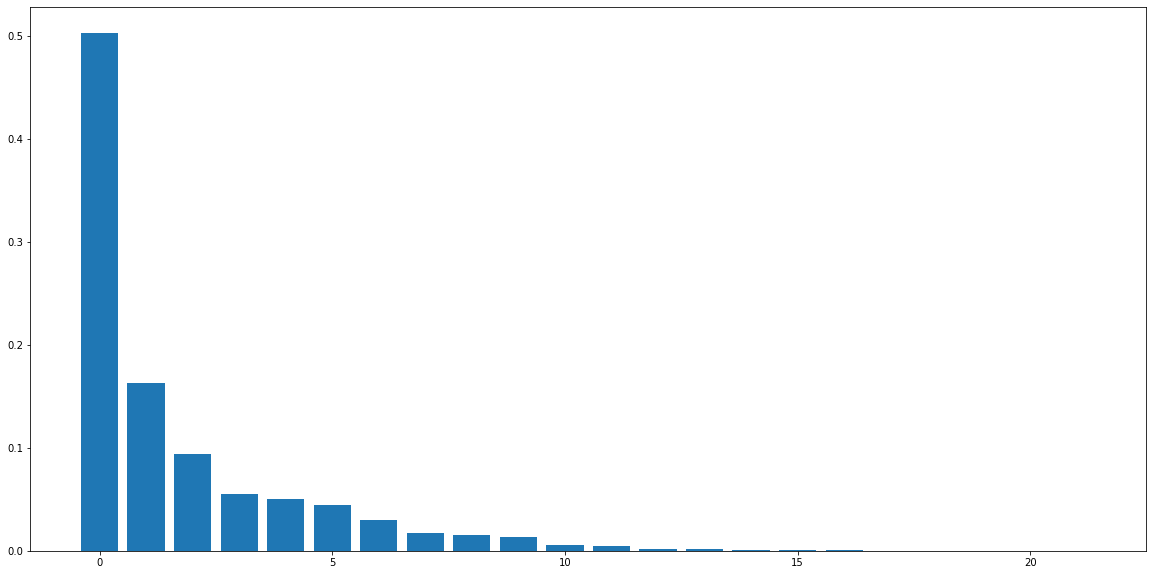

In [70]:
plt.bar(df_pca.index[:100], df_pca['variance_ratio'][:100])
plt.show()

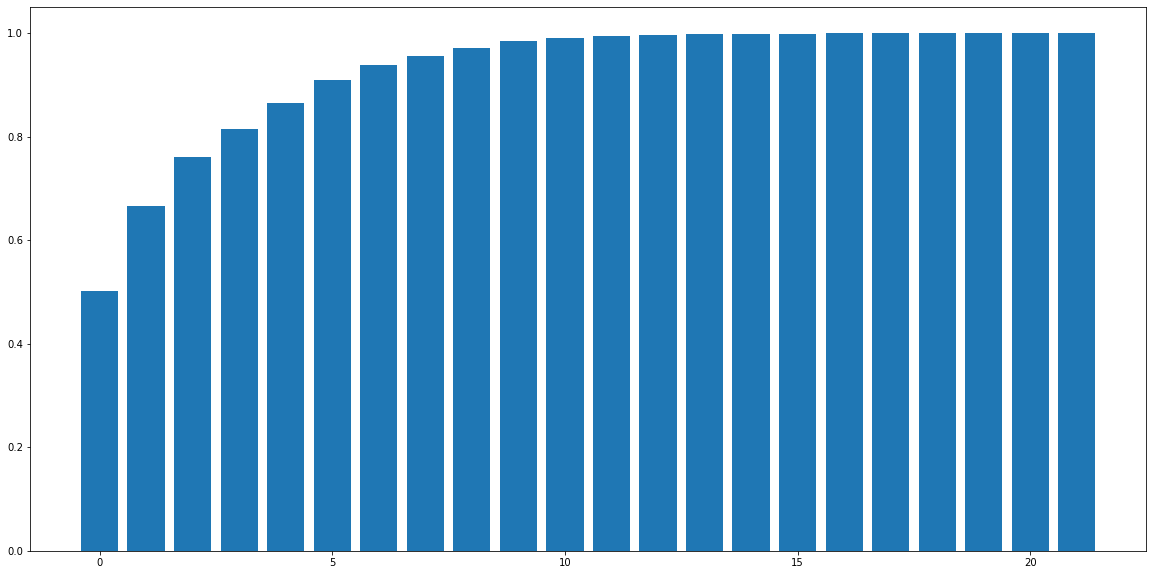

In [71]:
plt.bar(df_pca.index[:100], df_pca['cumulated_ratio'][:100])
plt.show()

### Classification Report

In [89]:
print("Logistic Regression:")
y_pred_rev = [1 if i > 0.45 else 0 for i in y_pred_prob1]
print(classification_report(y_test, y_pred_rev))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob1)))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.87      0.87      0.87        31

    accuracy                           0.79        39
   macro avg       0.69      0.69      0.69        39
weighted avg       0.79      0.79      0.79        39

AUC: 0.872983870967742


In [91]:
print("Naive Bayes")
y_pred_rev = [1 if i > 0.45 else 0 for i in y_pred_prob2]
print(classification_report(y_test, y_pred_rev))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob2)))

Naive Bayes
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39

AUC: 0.717741935483871


In [92]:
print("Logistic Regression")
y_pred_rev = [1 if i > 0.45 else 0 for i in y_pred_prob3]
print(classification_report(y_test, y_pred_rev))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob3)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39

AUC: 0.6814516129032258


In [93]:
print("Support Vector Machine")
y_pred_rev = [1 if i > 0.45 else 0 for i in y_pred_prob4]
print(classification_report(y_test, y_pred_rev))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob4)))

Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.84      1.00      0.91        31

    accuracy                           0.85        39
   macro avg       0.92      0.62      0.66        39
weighted avg       0.87      0.85      0.81        39

AUC: 0.6814516129032258


In [94]:
print(" Kernalized Support Vector Machine")
y_pred_rev = [1 if i > 0.45 else 0 for i in y_pred_prob5]
print(classification_report(y_test, y_pred_rev))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob5)))

 Kernalized Support Vector Machine
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.88      0.94      0.91        31

    accuracy                           0.85        39
   macro avg       0.77      0.72      0.74        39
weighted avg       0.84      0.85      0.84        39

AUC: 0.7540322580645161


In [95]:
print("Decision Tree")
y_pred_rev = [1 if i > 0.45 else 0 for i in y_pred_prob6]
print(classification_report(y_test, y_pred_rev))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob6)))

Decision Tree
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.88      0.94      0.91        31

    accuracy                           0.85        39
   macro avg       0.77      0.72      0.74        39
weighted avg       0.84      0.85      0.84        39

AUC: 0.717741935483871


## Deployment


In [96]:
import pickle 
# Saving model to disk
pickle.dump(gs_lr,open('deploy_gs_lr.pkl','wb'))
# Open the Pickle File 
model=pickle.load(open('deploy_gs_lr.pkl','rb'))
# Prediction 
model.predict (X_train)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

# A PROJECT BY BHARATH SRINIVAS SR